In [2]:
import pandas as pd
import numpy as np
import random
import csv
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn import metrics
from sklearn import svm
from time import time
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import math
import random
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("train.csv")

In [4]:
pd.set_option("display.max_columns",30)
data.head(3)

,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,4,April,23,Scientist,19114.12,NaN,3,4,3,4,5,4.0,6.27,4.0,Good,809.98,31.377862,268,No,49.574949,199.458074,223.451310,Good
1,5,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,Good,809.98,24.797347,269,No,49.574949,41.420153,341.489231,Good
2,6,June,23,Scientist,19114.12,NaN,3,4,3,4,8,4.0,9.27,4.0,Good,809.98,27.262259,270,No,49.574949,62.430172,340.479212,Good


In [5]:
data.isnull().sum()

ID                             0
Month                          0
Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       3994
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment      1869
Changed_Credit_Limit           0
Num_Credit_Inquiries         507
Credit_Mix                     0
Outstanding                    0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     1250
Monthly_Balance              327
Credit_Score                   0
dtype: int64

In [6]:
data = data.dropna(axis=0,how='any')

In [7]:
data.reset_index()

,index,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,3,10,February,28,Teacher,34847.84,3037.986667,2,4,6,1,7,1.0,7.42,2.0,Good,605.03,38.550848,320,No,18.816215,40.391238,484.591214,Good
1,4,13,May,28,Teacher,34847.84,3037.986667,2,4,6,1,3,1.0,6.42,2.0,Good,605.03,34.977895,323,No,18.816215,130.115420,444.867032,Good
2,5,14,June,28,Teacher,34847.84,3037.986667,2,4,6,1,3,0.0,5.42,2.0,Good,605.03,33.381010,324,No,18.816215,43.477190,481.505262,Good
3,7,16,August,28,Teacher,34847.84,3037.986667,2,4,6,1,3,4.0,5.42,2.0,Good,605.03,32.933856,326,No,18.816215,218.904344,356.078109,Good
4,8,17,January,34,_______,143162.64,12187.220000,1,5,8,3,5,8.0,7.10,3.0,Good,1303.01,28.616735,213,No,246.992320,168.413703,1043.315978,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18752,25935,99980,April,49,Writer,37188.10,3097.008333,1,4,5,3,3,12.0,5.38,3.0,Good,620.64,36.979007,360,NM,84.205949,215.486386,300.008498,Good
18753,25936,99983,July,50,Writer,37188.10,3097.008333,1,4,5,3,7,13.0,5.38,3.0,Good,620.64,38.850680,363,No,84.205949,82.825572,412.669312,Good
18754,25937,99986,February,28,Architect,20002.88,1929.906667,10,8,29,5,33,25.0,23.31,9.0,Bad,3571.70,39.772607,69,Yes,12112.000000,148.275233,273.750661,Poor
18755,25938,99987,March,28,Architect,20002.88,1929.906667,10,8,29,5,33,25.0,18.31,9.0,Bad,3571.70,24.713861,70,Yes,60.964772,76.282793,345.743101,Poor


In [8]:
data = data.drop(data[data.Occupation=='_______'].index)
data = data.drop(data[data.Credit_Mix=='_'].index)

In [9]:
data.head()

,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
3,10,February,28,Teacher,34847.84,3037.986667,2,4,6,1,7,1.0,7.42,2.0,Good,605.03,38.550848,320,No,18.816215,40.391238,484.591214,Good
4,13,May,28,Teacher,34847.84,3037.986667,2,4,6,1,3,1.0,6.42,2.0,Good,605.03,34.977895,323,No,18.816215,130.115420,444.867032,Good
5,14,June,28,Teacher,34847.84,3037.986667,2,4,6,1,3,0.0,5.42,2.0,Good,605.03,33.381010,324,No,18.816215,43.477190,481.505262,Good
7,16,August,28,Teacher,34847.84,3037.986667,2,4,6,1,3,4.0,5.42,2.0,Good,605.03,32.933856,326,No,18.816215,218.904344,356.078109,Good
9,18,February,34,Engineer,143162.64,12187.220000,1,5,8,3,13,6.0,7.10,3.0,Good,1303.01,41.702573,214,No,246.992320,232.860384,998.869297,Good


In [10]:
data.columns

Index(['ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [11]:
from sklearn.preprocessing import LabelEncoder
data['Occupation'] = LabelEncoder().fit_transform(data['Occupation'])
data['Credit_Mix'] = LabelEncoder().fit_transform(data['Credit_Mix'])
data['Payment_of_Min_Amount'] = LabelEncoder().fit_transform(data['Payment_of_Min_Amount'])
data['Month'] = LabelEncoder().fit_transform(data['Month'])
data['Credit_Score'] = LabelEncoder().fit_transform(data['Credit_Score'])

In [12]:
data.head()

,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
3,10,2,28,13,34847.84,3037.986667,2,4,6,1,7,1.0,7.42,2.0,1,605.03,38.550848,320,1,18.816215,40.391238,484.591214,0
4,13,7,28,13,34847.84,3037.986667,2,4,6,1,3,1.0,6.42,2.0,1,605.03,34.977895,323,1,18.816215,130.115420,444.867032,0
5,14,5,28,13,34847.84,3037.986667,2,4,6,1,3,0.0,5.42,2.0,1,605.03,33.381010,324,1,18.816215,43.477190,481.505262,0
7,16,1,28,13,34847.84,3037.986667,2,4,6,1,3,4.0,5.42,2.0,1,605.03,32.933856,326,1,18.816215,218.904344,356.078109,0
9,18,2,34,4,143162.64,12187.220000,1,5,8,3,13,6.0,7.10,3.0,1,1303.01,41.702573,214,1,246.992320,232.860384,998.869297,0


In [13]:
predictor = data.columns[1:22]

<AxesSubplot:>

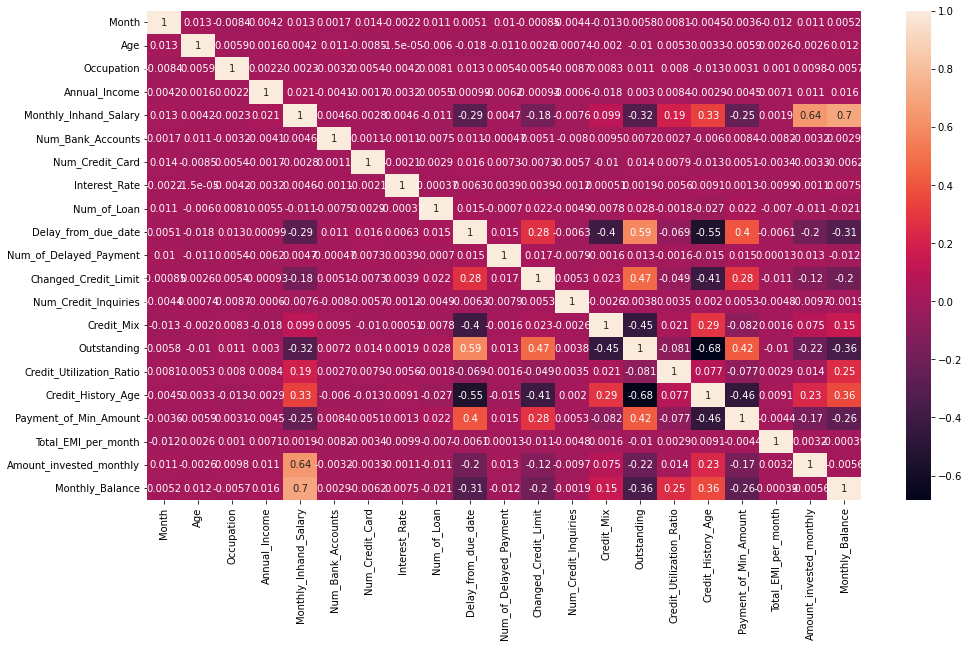

In [14]:
import seaborn as sns
plt.subplots(figsize=(16,9))
correlation_mat = data[predictor].corr()
sns.heatmap(correlation_mat,annot=True)

In [15]:
data = data.drop(columns = ['Monthly_Inhand_Salary','Delay_from_due_date', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding',
        'Credit_History_Age',
       'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Monthly_Balance'],axis=1)

In [16]:
data.head()

,ID,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Credit_Score
3,10,2,28,13,34847.84,2,4,6,1,1.0,2.0,38.550848,18.816215,0
4,13,7,28,13,34847.84,2,4,6,1,1.0,2.0,34.977895,18.816215,0
5,14,5,28,13,34847.84,2,4,6,1,0.0,2.0,33.381010,18.816215,0
7,16,1,28,13,34847.84,2,4,6,1,4.0,2.0,32.933856,18.816215,0
9,18,2,34,4,143162.64,1,5,8,3,6.0,3.0,41.702573,246.992320,0


In [17]:
predictor = data.columns[1:12]

In [18]:
data = data.drop(data[data.Age>100].index)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17124 entries, 3 to 25939
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17124 non-null  int64  
 1   Month                     17124 non-null  int32  
 2   Age                       17124 non-null  int64  
 3   Occupation                17124 non-null  int32  
 4   Annual_Income             17124 non-null  float64
 5   Num_Bank_Accounts         17124 non-null  int64  
 6   Num_Credit_Card           17124 non-null  int64  
 7   Interest_Rate             17124 non-null  int64  
 8   Num_of_Loan               17124 non-null  int64  
 9   Num_of_Delayed_Payment    17124 non-null  float64
 10  Num_Credit_Inquiries      17124 non-null  float64
 11  Credit_Utilization_Ratio  17124 non-null  float64
 12  Total_EMI_per_month       17124 non-null  float64
 13  Credit_Score              17124 non-null  int32  
dtypes: flo

In [20]:
data = data.sample(n=5000, random_state = 42)

In [21]:
data.columns

Index(['ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Credit_Score'],
      dtype='object')

In [22]:
from sklearn import preprocessing
predictors = data.columns[1:12]
X = data[predictors]
y = data.Credit_Score
#使用SMOTE采样，从训练集随机同类的两近邻样本合成一个新的样本，合成新样本的过采样方法可以降低过拟合的风险。
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X,y)

In [23]:
w = 0.7   #惯性因子
c1 = 2.05  #学习因子C1
c2 = 2.05  #学习因子C2
c = c1 + c2
# khi = 2 * K/ (abs(2 - c - math.sqrt(c ** 2 - 4 * c)))
khi = 2 / (abs(2 - c - math.sqrt(c ** 2 - 4 * c)))
n_iterations = 10   #设置迭代次数为10
n_particles = 50   #设置粒子数为50

#拟合函数fitness_function，使用3重KFold交叉验证，学习算法为SVM，核函数选择径向基核函数,评分标准为roc_auc，返回评分的均值
def fitness_function(position):
    kf = KFold(n_splits=3)
    svclassifier = svm.SVC(kernel='rbf', gamma=position[0], C=position[1])
    scores = cross_val_score(svclassifier,X,y, cv=kf, scoring='roc_auc')#三折交叉验证，使用roc_auc作为评价标准
    return np.mean(scores)

def plot(position):
    x = []#存储gamma列表
    y = []#存储C列表
    for i in range(0, len(particle_position_vector)):
        x.append(particle_position_vector[i][0])
        y.append(particle_position_vector[i][1])
    colors = (0, 0, 0)
    plt.scatter(x, y, c=colors, alpha=0.3)
    plt.xlabel('gamma')
    plt.ylabel('C')
    plt.axis([-1, 10, -1, 10])#。。。
    plt.gca().set_aspect('equal', adjustable='box')
    return plt.show()

#决定当前位置与最好位置之间的区域的分辨率(或精度)。如果太快，则粒子有可能越过极小点；
#如果太慢，则粒子不能在局部极小点之外进行足够的探索，会陷入到局部极值区域内。
#这种限制可以达到防止计算溢出、决定问题空间搜索的力度的目的
for i in range(n_particles):
    max_velocity = np.array([10, 10])
    min_velocity = np.array([-10, -10])
    max_position = np.array([10, 10])
    min_position = np.array([0.0001, 0.001])

#判定速度，若当前速度大于最快速度则令当前速度等于最快速度，若当前速度小于最慢速度则令当前速度等于最慢速度
def eval_velocity(new_velocity):
    for j in range(0, 2):
        if (new_velocity[j] > max_velocity[j]):
            new_velocity[j] = max_velocity[j]
        elif (new_velocity[j] < min_velocity[j]):
            new_velocity[j] = min_velocity[j]
    return new_velocity

def eval_position(particle_position_vector):
    for j in range(0, 2):
        if (particle_position_vector[j] > max_position[j]):
            particle_position_vector[j] = max_position[j]
        elif (particle_position_vector[j] < min_position[j]):
            particle_position_vector[j] = min_position[j]
    return particle_position_vector

#粒子的位置向量，取0~1随机数并乘10，这是个n*2的矩阵
particle_position_vector = np.array([np.array([random.random() * 10, random.random() * 10]) for _ in range(n_particles)])  #
pbest_position = particle_position_vector
pbest_fitness_value = np.array([0 for _ in range(n_particles)])
gbest_fitness_value = np.array([0])
gbest_position = np.array([float('inf'), float('inf')])
velocity_vector = np.array([np.array([(-1) ** (bool(random.getrandbits(1))) * random.random() * 2,
                                      (-1) ** (bool(random.getrandbits(1))) * random.random() * 2]) for _ in range(n_particles)])
# velocity_vector = ([np.array([0, 0]) for _ in range(n_particles)])
iteration = 0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


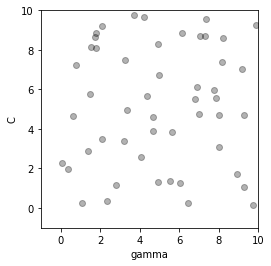

AUC for particle - 1 is 0.5475341063240343  At (gamma, c):  [6.05641318 1.29080501] .. Time =  6.4192633628845215
AUC for particle - 2 is 0.6142686895485439  At (gamma, c):  [1.73639037 8.64131665] .. Time =  6.318092107772827
AUC for particle - 3 is 0.557555079831754  At (gamma, c):  [4.69018799 4.61464542] .. Time =  6.349895238876343
AUC for particle - 4 is 0.6918156667281904  At (gamma, c):  [0.63727025 4.67144278] .. Time =  6.327202558517456
AUC for particle - 5 is 0.5605792242746866  At (gamma, c):  [4.34404205 5.65463768] .. Time =  6.364886999130249
AUC for particle - 6 is 0.5523186313140954  At (gamma, c):  [5.54417545 1.34443003] .. Time =  6.4187538623809814
AUC for particle - 7 is 0.627542270460253  At (gamma, c):  [1.49455514 5.75186286] .. Time =  6.329747676849365
AUC for particle - 8 is 0.555675521880565  At (gamma, c):  [4.98000426 6.71087723] .. Time =  6.350587844848633
AUC for particle - 9 is 0.8499374241938037  At (gamma, c):  [0.05059211 2.3029869 ] .. Time =  6.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The best position in iteration number 1 is [0.05059211 2.3029869 ] with AUC: 0.8499374241938037
335.5925371646881


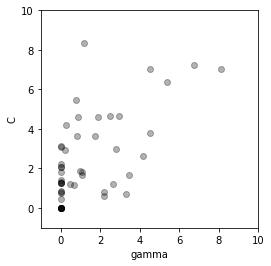

AUC for particle - 1 is 0.5732502221660853  At (gamma, c):  [3.45580941 1.66027766] .. Time =  6.367570638656616
AUC for particle - 2 is 0.756737854388125  At (gamma, c):  [0.26689746 4.18410802] .. Time =  6.401820659637451
AUC for particle - 3 is 0.581983171902612  At (gamma, c):  [2.93601412 4.67668636] .. Time =  6.3748931884765625
AUC for particle - 4 is 0.8369725537145593  At (gamma, c):  [1.00000000e-04 3.14964336e+00] .. Time =  4.651170253753662
AUC for particle - 5 is 0.8099190499413312  At (gamma, c):  [1.00000000e-04 1.32775265e+00] .. Time =  4.88249945640564
AUC for particle - 6 is 0.8362310882413625  At (gamma, c):  [1.00000000e-04 3.07285579e+00] .. Time =  4.615212440490723
AUC for particle - 7 is 0.667126752344422  At (gamma, c):  [0.87378597 4.5913134 ] .. Time =  6.331084966659546
AUC for particle - 8 is 0.8244083142170112  At (gamma, c):  [1.00000000e-04 2.06259164e+00] .. Time =  4.756206750869751
AUC for particle - 9 is 0.8122622274608075  At (gamma, c):  [1.0000

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The best position in iteration number 2 is [1.00000000e-04 3.14964336e+00] with AUC: 0.8369725537145593
287.39840292930603


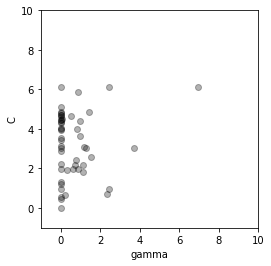

AUC for particle - 1 is 0.6257974104763798  At (gamma, c):  [1.53735372 2.59128019] .. Time =  6.33247709274292
AUC for particle - 2 is 0.8399493988498644  At (gamma, c):  [1.00000000e-04 3.55207164e+00] .. Time =  4.598499774932861
AUC for particle - 3 is 0.6294106078812496  At (gamma, c):  [1.4362486  4.83305407] .. Time =  6.3352272510528564
AUC for particle - 4 is 0.8429067107947916  At (gamma, c):  [1.00000000e-04 3.95621636e+00] .. Time =  4.557599306106567
AUC for particle - 5 is 0.8560653018347613  At (gamma, c):  [0.02940597 1.95934152] .. Time =  6.280331134796143
AUC for particle - 6 is 0.8458208381183896  At (gamma, c):  [0.05854387 4.48013221] .. Time =  6.272398948669434
AUC for particle - 7 is 0.7053500172904045  At (gamma, c):  [0.54378757 4.63354643] .. Time =  6.306134462356567
AUC for particle - 8 is 0.843661675631358  At (gamma, c):  [1.00000000e-04 4.07200495e+00] .. Time =  4.5695641040802
AUC for particle - 9 is 0.8271284987843615  At (gamma, c):  [1.00000000e-04

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The best position in iteration number 3 is [0.00627377 4.58714149] with AUC: 0.8630157579032297
279.6177978515625


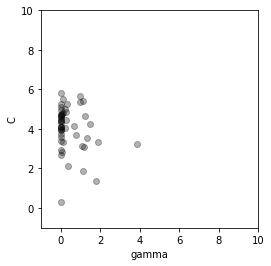

AUC for particle - 1 is 0.775923781407751  At (gamma, c):  [0.20281335 5.01024898] .. Time =  6.365866422653198
AUC for particle - 2 is 0.8403195711509911  At (gamma, c):  [1.00000000e-04 3.60715555e+00] .. Time =  4.572242498397827
AUC for particle - 3 is 0.8225599608838997  At (gamma, c):  [0.0942956  5.53261577] .. Time =  6.322536945343018
AUC for particle - 4 is 0.8477236506892121  At (gamma, c):  [1.00000000e-04 4.94923935e+00] .. Time =  4.509045362472534
AUC for particle - 5 is 0.8491370190648554  At (gamma, c):  [0.05198883 2.8185135 ] .. Time =  6.263020753860474
AUC for particle - 6 is 0.812532649532677  At (gamma, c):  [0.11397111 4.81675168] .. Time =  6.311693429946899
AUC for particle - 7 is 0.7624073160798183  At (gamma, c):  [0.25037024 4.87489638] .. Time =  6.349031448364258
AUC for particle - 8 is 0.848954468184382  At (gamma, c):  [1.00000000e-04 5.24902266e+00] .. Time =  4.4842588901519775
AUC for particle - 9 is 0.8328720473025627  At (gamma, c):  [1.00000000e-0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The best position in iteration number 4 is [0.03238858 3.93498165] with AUC: 0.855668673848356
279.9197826385498


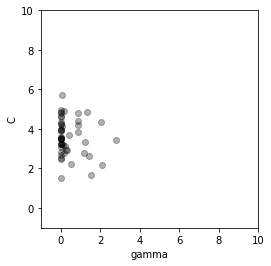

AUC for particle - 1 is 0.6682287208121062  At (gamma, c):  [0.85594471 4.79254156] .. Time =  6.327566623687744
AUC for particle - 2 is 0.8395747043349574  At (gamma, c):  [1.0000000e-04 3.4886268e+00] .. Time =  4.577616453170776
AUC for particle - 3 is 0.8518583764150037  At (gamma, c):  [0.04742997 5.70237674] .. Time =  6.225207090377808
AUC for particle - 4 is 0.8447030438368502  At (gamma, c):  [1.00000000e-04 4.25714123e+00] .. Time =  4.5294716358184814
AUC for particle - 5 is 0.8355238712595606  At (gamma, c):  [0.07518843 3.26177736] .. Time =  6.2624266147613525
AUC for particle - 6 is 0.8309805925991043  At (gamma, c):  [0.08204904 4.17049146] .. Time =  6.290379285812378
AUC for particle - 7 is 0.7891979099902057  At (gamma, c):  [0.16713875 4.88449472] .. Time =  6.295295476913452
AUC for particle - 8 is 0.8462087559385366  At (gamma, c):  [1.00000000e-04 4.60478337e+00] .. Time =  4.535985231399536
AUC for particle - 9 is 0.8311012611614134  At (gamma, c):  [1.00000000e

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The best position in iteration number 5 is [0.02231442 2.81642161] with AUC: 0.8581440424131902
276.7200360298157


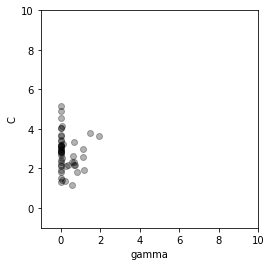

AUC for particle - 1 is 0.7038146693922926  At (gamma, c):  [0.55709269 2.34176064] .. Time =  6.309811353683472
AUC for particle - 2 is 0.8356074020855372  At (gamma, c):  [1.00000000e-04 3.00169628e+00] .. Time =  4.635286808013916
AUC for particle - 3 is 0.8604258568530164  At (gamma, c):  [0.01503746 4.91966547] .. Time =  6.227947235107422
AUC for particle - 4 is 0.8458909324737909  At (gamma, c):  [1.0000000e-04 4.5388744e+00] .. Time =  4.552423715591431
AUC for particle - 5 is 0.824099215796465  At (gamma, c):  [0.09168163 3.24928921] .. Time =  6.267094850540161
AUC for particle - 6 is 0.849015554727368  At (gamma, c):  [0.05255983 2.50766   ] .. Time =  6.223530530929565
AUC for particle - 7 is 0.8354457202060113  At (gamma, c):  [0.0745007  4.17026837] .. Time =  6.2583088874816895
AUC for particle - 8 is 0.8392049216147653  At (gamma, c):  [1.00000000e-04 3.44589405e+00] .. Time =  4.606837272644043
AUC for particle - 9 is 0.8204724913118628  At (gamma, c):  [1.00000000e-04

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The best position in iteration number 6 is [0.01503746 4.91966547] with AUC: 0.8604258568530164
275.0419108867645


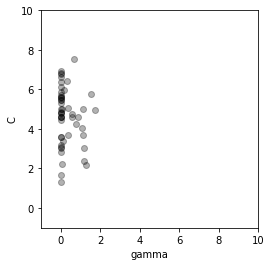

AUC for particle - 1 is 0.6420437808290927  At (gamma, c):  [1.17027379 2.38035321] .. Time =  6.3468897342681885
AUC for particle - 2 is 0.8461636609143062  At (gamma, c):  [1.00000000e-04 4.59684883e+00] .. Time =  4.5353991985321045
AUC for particle - 3 is 0.8510726775574889  At (gamma, c):  [1.00000000e-04 5.84699135e+00] .. Time =  4.4138877391815186
AUC for particle - 4 is 0.8501720974902347  At (gamma, c):  [1.0000000e-04 5.5850932e+00] .. Time =  4.461066722869873
AUC for particle - 5 is 0.8442588241076159  At (gamma, c):  [0.06233521 5.00839054] .. Time =  6.256081581115723
AUC for particle - 6 is 0.8190464657222499  At (gamma, c):  [0.10202574 3.40959618] .. Time =  6.273879528045654
AUC for particle - 7 is 0.8527742090575746  At (gamma, c):  [1.00000000e-04 6.36313083e+00] .. Time =  4.404006242752075
AUC for particle - 8 is 0.8472326109882343  At (gamma, c):  [1.00000000e-04 4.85320105e+00] .. Time =  4.5070273876190186
AUC for particle - 9 is 0.817134387214697  At (gamma, 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The best position in iteration number 7 is [0.00942149 5.72368163] with AUC: 0.8612666229666711
270.4345328807831


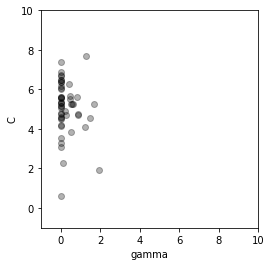

AUC for particle - 1 is 0.7263721848313404  At (gamma, c):  [0.4082217  6.29352894] .. Time =  6.336306571960449
AUC for particle - 2 is 0.846795610370151  At (gamma, c):  [1.00000000e-04 4.73853805e+00] .. Time =  4.52444052696228
AUC for particle - 3 is 0.8536145336993588  At (gamma, c):  [1.00000000e-04 6.70013852e+00] .. Time =  4.412973403930664
AUC for particle - 4 is 0.8531521702841963  At (gamma, c):  [1.00000000e-04 6.49014489e+00] .. Time =  4.468427419662476
AUC for particle - 5 is 0.8588286941148913  At (gamma, c):  [0.02098449 6.05896542] .. Time =  6.232146263122559
AUC for particle - 6 is 0.8560216715265115  At (gamma, c):  [0.03392041 6.90237501] .. Time =  6.215721368789673
AUC for particle - 7 is 0.8528641307068341  At (gamma, c):  [1.00000000e-04 6.38201988e+00] .. Time =  4.384676218032837
AUC for particle - 8 is 0.8516393953393472  At (gamma, c):  [1.0000000e-04 6.0127331e+00] .. Time =  4.428084135055542
AUC for particle - 9 is 0.8362866402843162  At (gamma, c):  

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The best position in iteration number 8 is [0.02098449 6.05896542] with AUC: 0.8588286941148913
269.18874526023865


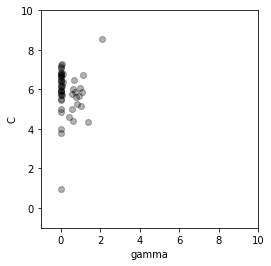

AUC for particle - 1 is 0.6541710886544347  At (gamma, c):  [0.99777811 6.07148908] .. Time =  6.298002004623413
AUC for particle - 2 is 0.8479918988020826  At (gamma, c):  [1.00000000e-04 5.03069449e+00] .. Time =  4.464840888977051
AUC for particle - 3 is 0.8614747627419495  At (gamma, c):  [0.00866769 6.82683664] .. Time =  6.207865238189697
AUC for particle - 4 is 0.8541503826928333  At (gamma, c):  [1.00000000e-04 6.90589175e+00] .. Time =  4.858079433441162
AUC for particle - 5 is 0.8499394101784237  At (gamma, c):  [0.05029046 6.15439866] .. Time =  6.196241140365601
AUC for particle - 6 is 0.8146472639458661  At (gamma, c):  [0.1106021  6.39950098] .. Time =  6.317273855209351
AUC for particle - 7 is 0.8534776647235279  At (gamma, c):  [1.00000000e-04 6.63987447e+00] .. Time =  4.400190114974976
AUC for particle - 8 is 0.8538978002891083  At (gamma, c):  [1.00000000e-04 6.80019394e+00] .. Time =  4.392458200454712
AUC for particle - 9 is 0.8419501027875711  At (gamma, c):  [1.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The best position in iteration number 9 is [0.00866769 6.82683664] with AUC: 0.8614747627419495
270.8875033855438


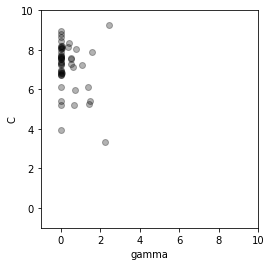

AUC for particle - 1 is 0.6336353534385403  At (gamma, c):  [1.35780181 6.12000022] .. Time =  6.326981544494629
AUC for particle - 2 is 0.8551499791484048  At (gamma, c):  [1.00000000e-04 7.27237071e+00] .. Time =  4.835524320602417
AUC for particle - 3 is 0.8560724378851668  At (gamma, c):  [1.00000000e-04 7.75416252e+00] .. Time =  4.776766777038574
AUC for particle - 4 is 0.8564358267588452  At (gamma, c):  [1.00000000e-04 7.87713262e+00] .. Time =  4.7397825717926025
AUC for particle - 5 is 0.8549192826382961  At (gamma, c):  [0.03784756 7.58052945] .. Time =  6.218312501907349
AUC for particle - 6 is 0.8458151777783639  At (gamma, c):  [0.05841905 8.08613647] .. Time =  6.2149498462677
AUC for particle - 7 is 0.856837902678805  At (gamma, c):  [1.00000000e-04 8.06754832e+00] .. Time =  4.682593822479248
AUC for particle - 8 is 0.8582244593954648  At (gamma, c):  [1.00000000e-04 8.78798766e+00] .. Time =  4.662157773971558
AUC for particle - 9 is 0.8427794085515569  At (gamma, c):

In [24]:
start = time()
iteration = 0
while iteration < n_iterations:
    gbest_fitness_value_cadidate = np.array([0])
    gbest_position_cadidate = np.array([float('inf'), float('inf')])
    start1 = time()
    plot(particle_position_vector)

    for i in range(n_particles):
        start2 = time()
        fitness_cadidate = fitness_function(particle_position_vector[i])
        stop2 = time()
        print("AUC for particle -", i + 1, "is", fitness_cadidate, " At (gamma, c): ", particle_position_vector[i],
              ".. Time = ", stop2 - start2)

        if (pbest_fitness_value[i] < fitness_cadidate):
            pbest_fitness_value[i] = fitness_cadidate
            pbest_position[i] = particle_position_vector[i]

        if (gbest_fitness_value_cadidate < fitness_cadidate):
            gbest_fitness_value_cadidate = fitness_cadidate
            gbest_position_cadidate = particle_position_vector[i]

    print("The best position in iteration number", iteration + 1, "is", gbest_position_cadidate, "with AUC:",
          fitness_function(gbest_position_cadidate))

    # if(gbest_fitness_value < gbest_fitness_value_cadidate):
    #    gbest_fitness_value = gbest_fitness_value_cadidate
    #   gbest_position = gbest_position_cadidate
    # print("The best position so far is ", gbest_position, "in iteration number", iteration + 1, "with AUC:", fitness_function(gbest_position))

    for i in range(n_particles):
        new_velocity = khi * (
                    w*velocity_vector[i] + (c1 * random.random()) * (pbest_position[i] - particle_position_vector[i]) + (
                        c2 * random.random()) * (gbest_position_cadidate - particle_position_vector[i]))
        new_velocity = eval_velocity(new_velocity)
        particle_position_vector[i] = new_velocity + particle_position_vector[i]
        particle_position_vector[i] = eval_position(particle_position_vector[i])

    iteration = iteration + 1
    stop1 = time()
    sec = stop1 - start1
    print(sec)
stop = time()
print(stop - start)

得到最佳参数gamma=0.00627377，c=4.58714149，此时AUC值为0.863

In [24]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.25,random_state=42)

In [25]:
fitness_function([0.00627377,4.58714149])

0.8630142235039387

In [31]:
classfier = svm.SVC(C=4.58714149,gamma=0.00627377,kernel='rbf',probability=True)

In [32]:
classfier.fit(X_train,y_train)

SVC(C=4.58714149, gamma=0.00627377, probability=True)

In [33]:
pred_svc = classfier.predict(X_test)

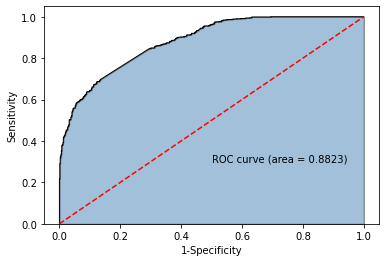

In [47]:
y_score = classfier.predict_proba(X_test)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,y_score)

#计算AUC值
roc_auc = metrics.auc(fpr,tpr)
#绘制面积图
plt.stackplot(fpr,tpr,color='steelblue',alpha=0.5,edgecolor='black')

#添加边际线和对角线
plt.plot(fpr,tpr,color = 'black',lw = 1)
plt.plot([0,1],[0,1],color = 'red',linestyle = '--')

#添加文本信息
plt.text(0.5,0.3,'ROC curve (area = %0.4f)'%roc_auc)

#添加x轴和y轴标签
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.show()